In [456]:
#Importing required Lib.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [457]:
df=pd.read_csv("Census Income.csv")  #Added column name to the csv file & then import & read using Pandas lib.

In [458]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [459]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis

In [460]:
df.shape

(32560, 15)

In [461]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there is no missing values.

But, while having a close look at our dataset, we observe some of the values as ‘?’, which represent missing values.

Hence, we deduce that there are some values in our data set which need to be treated.


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Total 9 object & 6 numerical columns

In [463]:
df['Occupation'].nunique()

15

In [464]:
df['Capital_gain'].nunique()

119

In [465]:
df['Capital_loss'].nunique()

92

In [466]:
df['Workclass'].nunique()

9

In [467]:
df['Education'].nunique()

16

In [468]:
df['Race'].nunique()

5

We also check the numerical statistics of our data using data.describe() command –

In [469]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Following observations are made in this step –

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.

- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.

Further, we have a look at our dataset and explore the data in various columns, one by one –

In [470]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)

Object Data Type Columns are:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Number Data Type Columns are: 
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


<Axes: xlabel='Age', ylabel='Density'>

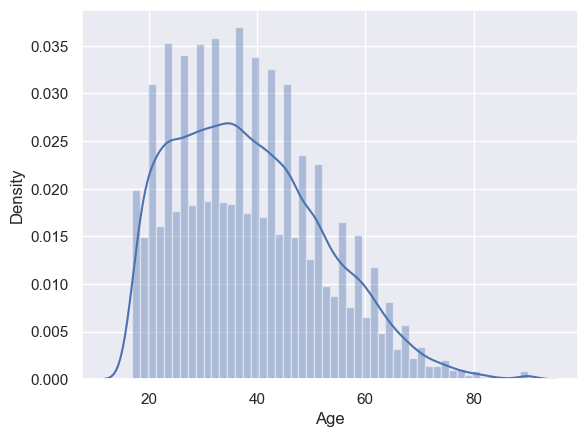

In [471]:
#create a distribution plot for the age column

sns.distplot(df.Age)

We observe that our data is has right skewness, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases.

We also observe that we do not have any null values in the age column.

In [472]:
df.Workclass.value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

While checking the unique values for workclass, we see that we have 7 different types of values, along with some missing values represented by ‘?’. The count of null values is 1836, which is around 5% of the data.

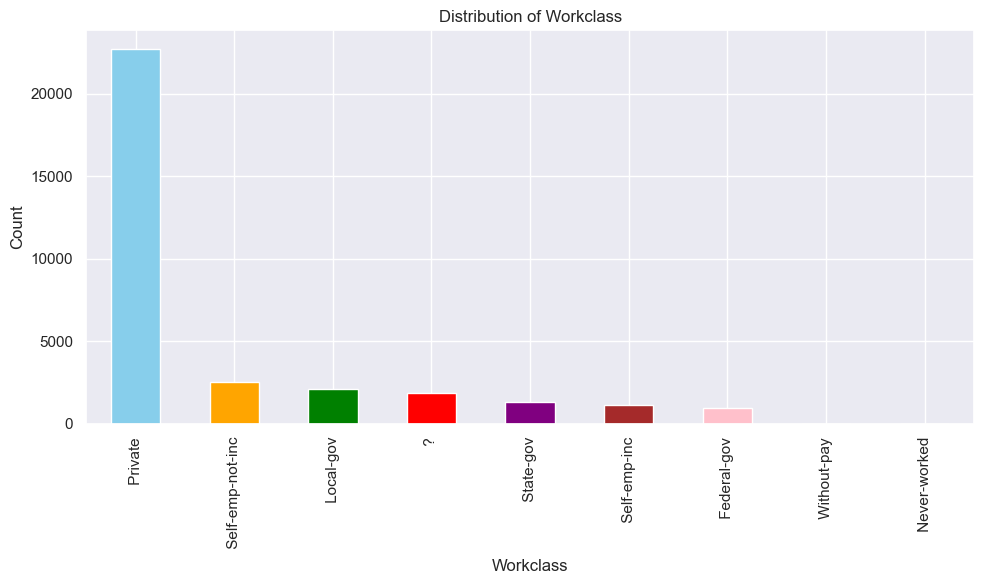

In [473]:
# Define colors for each category
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

# Plot the bar plot with custom colors
plt.figure(figsize=(10, 6))
df['Workclass'].value_counts().plot(kind='bar', color=colors)

# Add title and labels
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

We also make an interesting discovery here — The values where ‘Workclass’ is missing, also has ‘Occupation’ missing! 

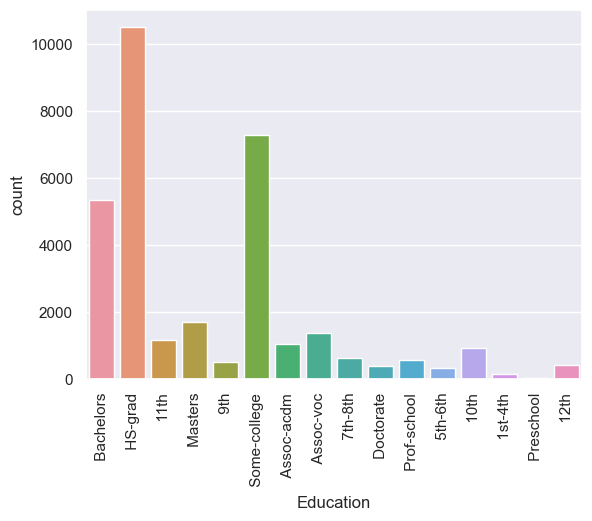

In [474]:
# Create countplot for the 'Education' column
sns.countplot(x='Education', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

We observe no missing values in this column, and also find out that majority of the people have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

In [475]:
df.Education_num.value_counts()

Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

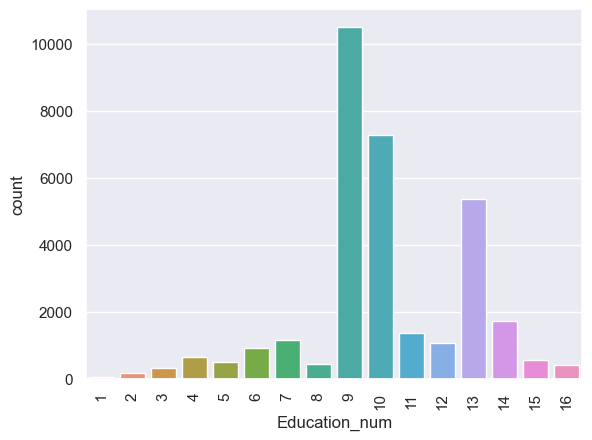

In [476]:
# Create countplot for the 'Education' column
sns.countplot(x='Education_num', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

The ‘Marital_Status’ column has 7 different categories available, and has no missing values.

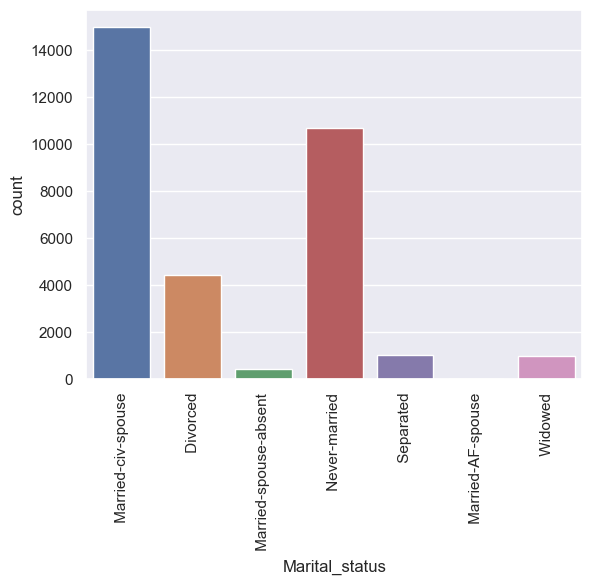

In [477]:
# Create countplot for the 'Education' column
sns.countplot(x='Marital_status', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’.

Count of ‘Never-married’ is also quite high.

Occupation: The occupation column contains 14 different categories, and have missing values represented by ‘?’ (which we have already observed, and combined with ‘Workclass’ column).

But the count of missing values is slightly higher than ‘Workclass’ column — 1843.

So, We try to find out the extra rows where the ‘Occupation’ is missing –

In [478]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


As we We observe that in case the ‘Workclass’ is ‘Never-worked’, then also the ‘Occupation’ is missing.

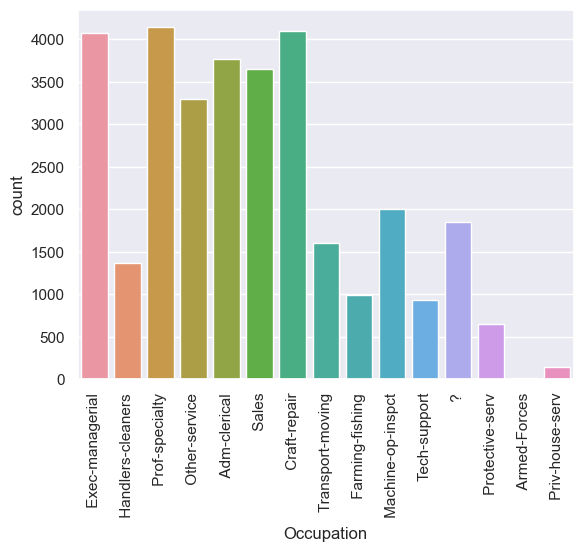

In [479]:
# Create countplot for the 'Education' column
sns.countplot(x='Occupation', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

The relationship column contains 6 different types of values, with highest number set for ‘Husband’ and lowest for ‘Other-relative’. The column does not have any missing value.

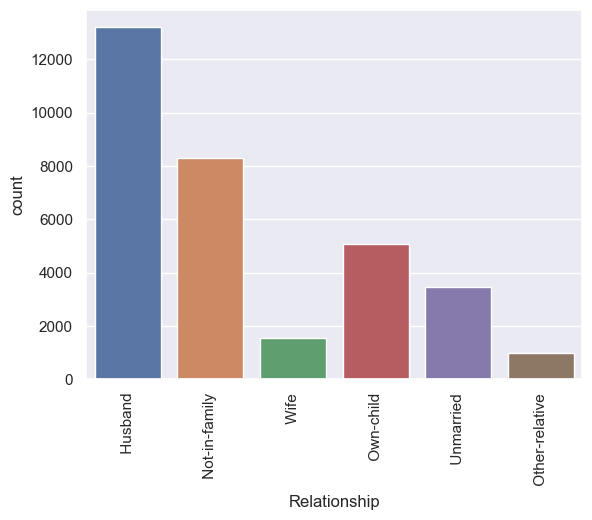

In [480]:
# Create countplot for the 'Education' column
sns.countplot(x='Relationship', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

The Race column has 5 different categories, and no missing data. Highest number of people have race as ‘White’ (significantly high numbers).

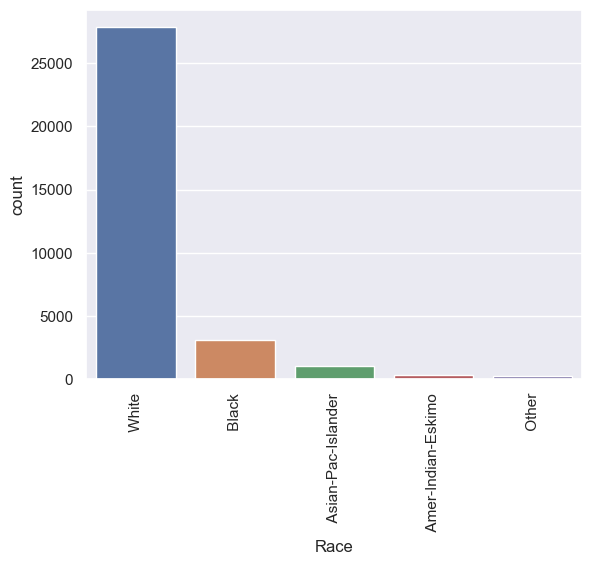

In [481]:
# Create countplot for the 'Education' column
sns.countplot(x='Race', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

The ‘Sex’ column has 2 categories — Male and Female, where number of males are almost double to number of females. Missing values are not found in this column.

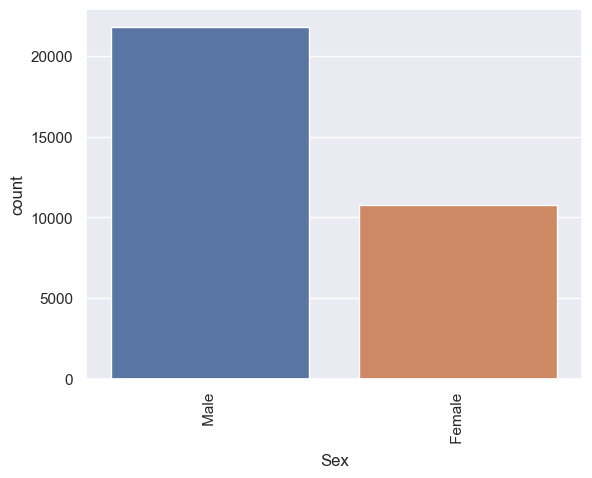

In [482]:
# Create countplot for the 'Education' column
sns.countplot(x='Sex', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

‘Capital_gain’ column is a numeric column, with majority of the values set as 0. The distribution plot for ‘Capital_gain’ column is highly right skewed.

<Axes: xlabel='Capital_gain', ylabel='Density'>

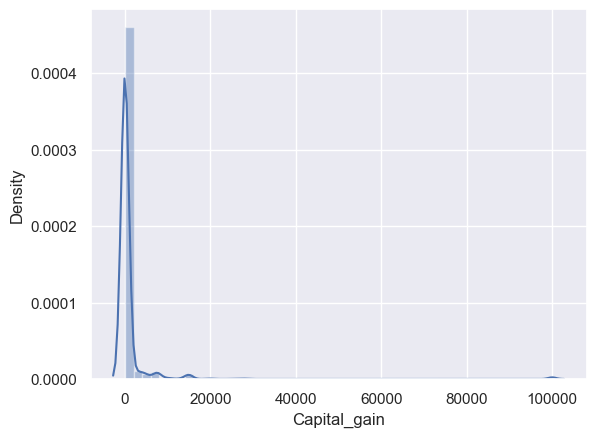

In [483]:
sns.distplot(df.Capital_gain)

The ‘Capital_loss’ column also has majority of the values set as 0, similar to ‘Capital_gains’. The data is highly right skewed in this case as well.

<Axes: xlabel='Capital_loss', ylabel='Density'>

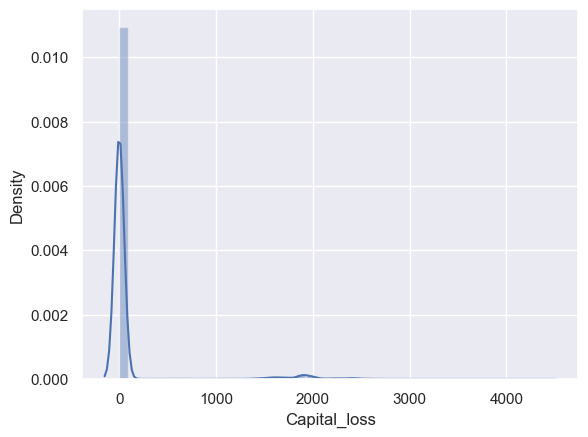

In [484]:
sns.distplot(df.Capital_loss)

The hours per week column has values scattered over a range of 1–99. The column does not have any missing values. Majority of the values have data near 40 hours and hence a high peak can be observed in the below distribution plot –

<Axes: ylabel='Density'>

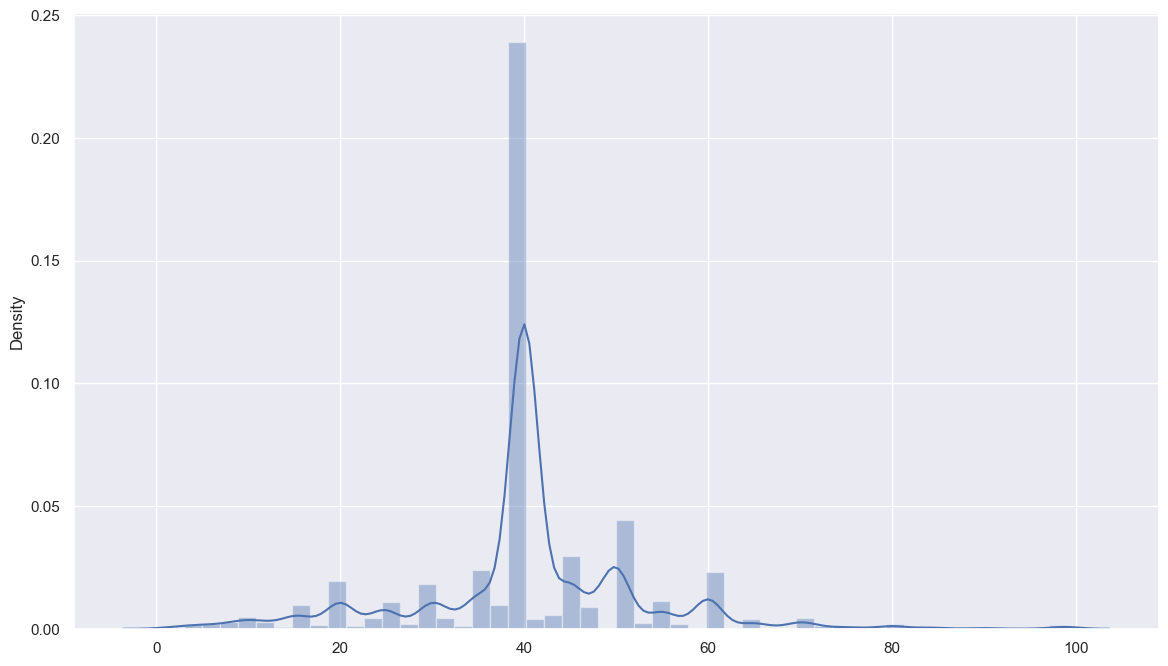

In [485]:
plt.figure(figsize=(14,8))
sns.distplot(x=df.Hours_per_week)

In [486]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers (highest count after US is 643).

We also have 583 missing values in this column, which we need to treat.

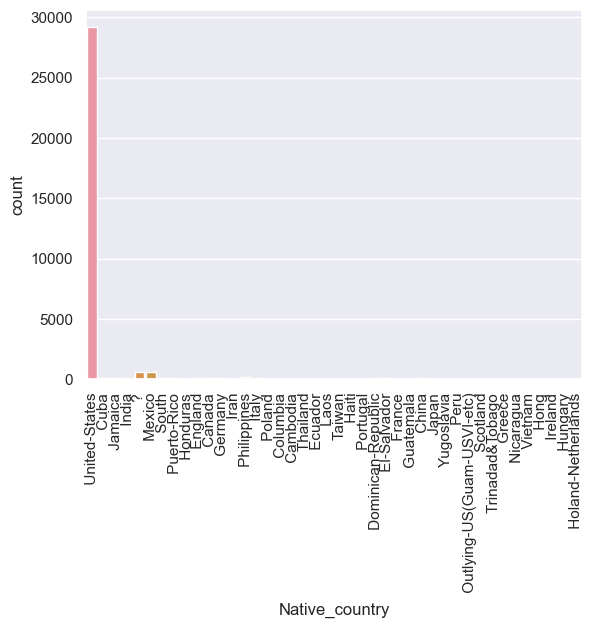

In [487]:
# Create countplot for the 'Education' column
sns.countplot(x='Native_country', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

We also have 583 missing values in this column, which we need to treat.

We further check how the income gets impacted due to the features which we just explored.

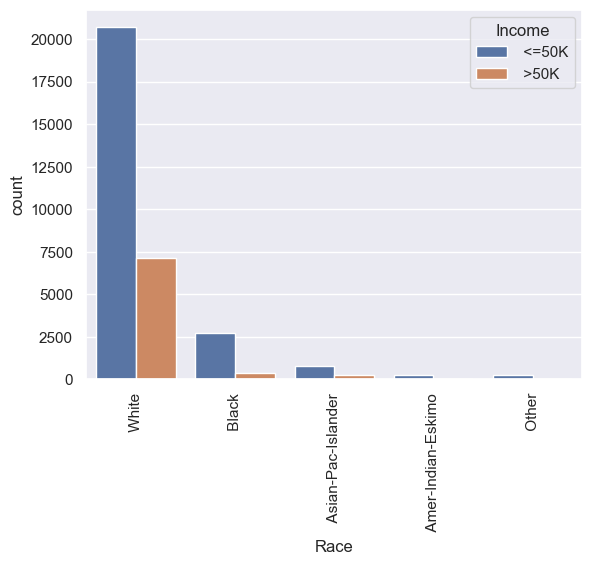

In [488]:
# Create countplot for the 'Race' column with 'Income' as hue
sns.countplot(x='Race', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

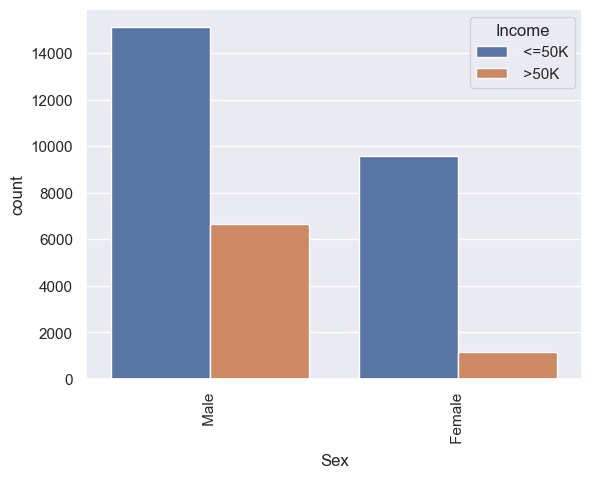

In [489]:
# Create countplot for the 'Race' column with 'Income' as hue
sns.countplot(x='Sex', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

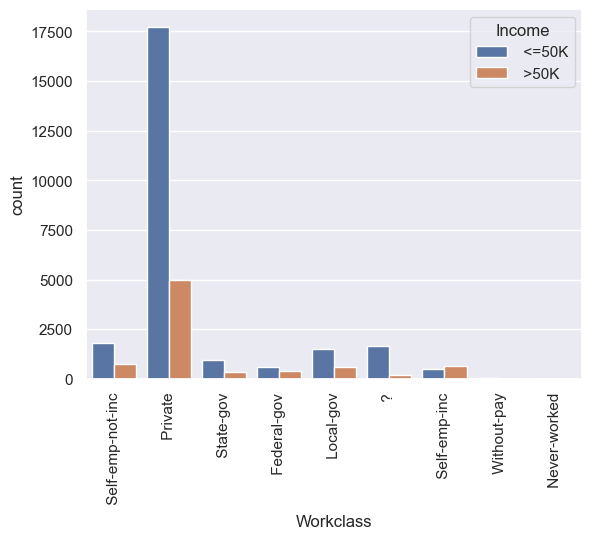

In [490]:
# Create countplot for the 'Race' column with 'Income' as hue
sns.countplot(x='Workclass', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

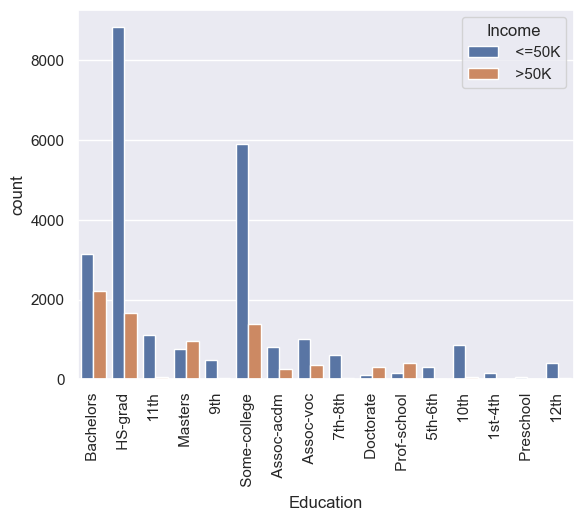

In [491]:
# Create countplot for the 'Race' column with 'Income' as hue
sns.countplot(x='Education', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

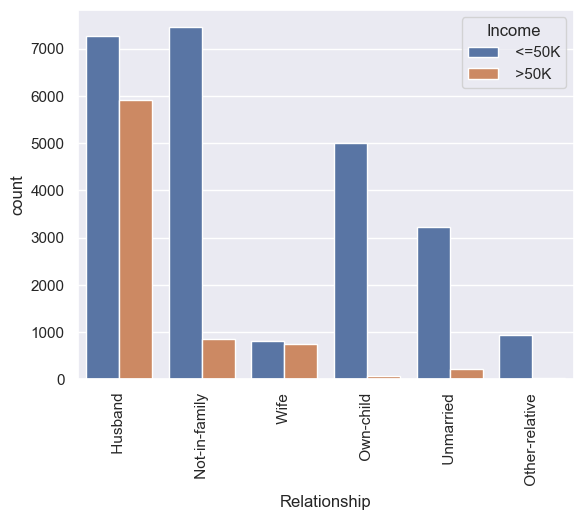

In [492]:
# Create countplot for the 'Race' column with 'Income' as hue
sns.countplot(x='Relationship', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

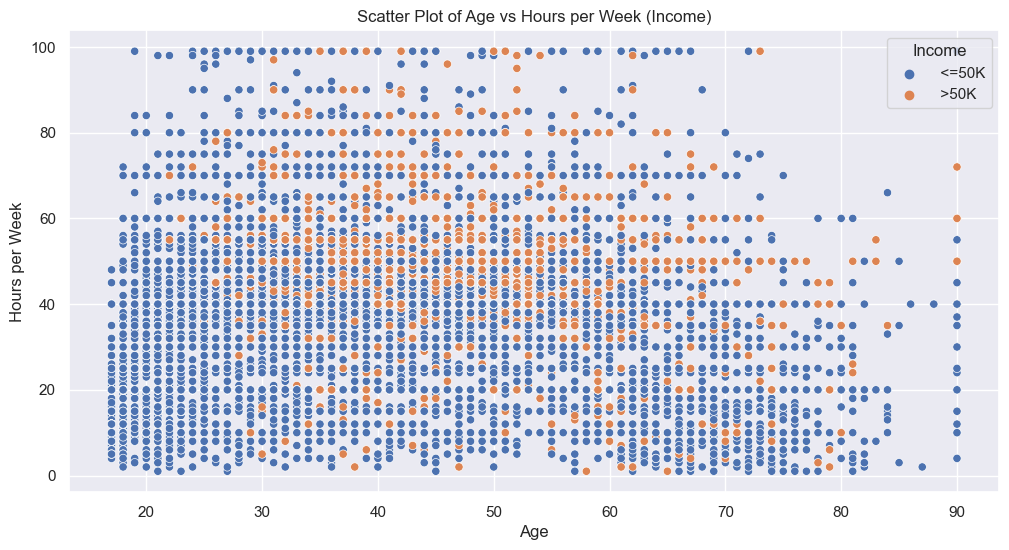

In [493]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create scatter plot for Age vs Hours_per_week with Income as hue
sns.scatterplot(x='Age', y='Hours_per_week', hue='Income', data=df)

# Add title and labels
plt.title('Scatter Plot of Age vs Hours per Week (Income)')
plt.xlabel('Age')
plt.ylabel('Hours per Week')

# Show plot
plt.show()

If we check the correlation between the numeric columns, we observe that –

In [494]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [495]:
categorical_col=['Income']

In [496]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_col:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
        
df        

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


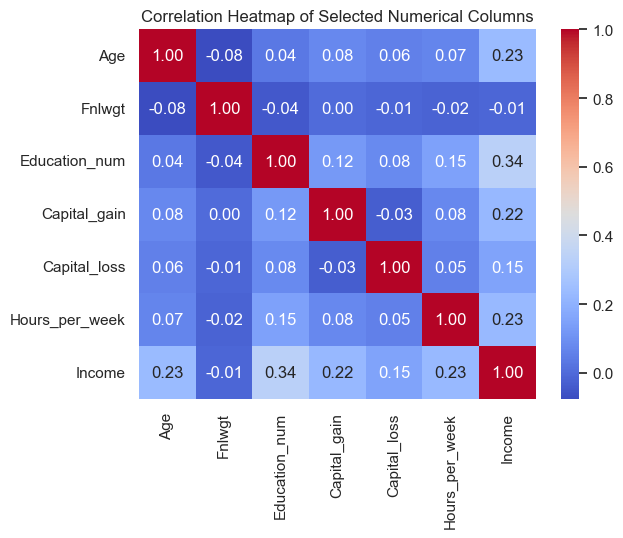

In [497]:
numerical_col = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']
dfcorr = df[numerical_col].corr()
sns.heatmap(dfcorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.show()

Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’. The correlations are moderate.

# Data modeling

We now proceed to an important part of our process — data modeling. Based on our analysis above, we will fill the missing values in our data, and group certain categories logically, to allow our model to learn better.

Replacing missing values –

We choose to replace the missing values with the mode of the data, i.e. the most frequently occurring values.

Hence, we replace ‘?’ is ‘Workclass’ column by ‘Private’, ‘Occupation’ column by ‘Prof-speciality’ and ‘Native_country’ by ‘United_States’.

In [498]:
df['Workclass'] = df['Workclass'].str.replace('^\s*\?+\s*$', 'Private', regex=True)
df['Occupation'] = df['Occupation'].str.replace('^\s*\?+\s*$', 'Prof-specialty', regex=True)
df['Native_country'] = df['Native_country'].str.replace('^\s*\?+\s*$', 'United-States', regex=True)


In [499]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [500]:
# Unique values of the 'Workclass' column
unique_workclass = df['Workclass'].unique()

print("Unique values of Workclass:", unique_workclass)

Unique values of Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 'Private' ' Self-emp-inc' ' Without-pay' ' Never-worked']


We put ‘Never-worked’ and ‘Without-pay’ in one category, we classify ‘State-gov’ and ‘Local-gov’ as ‘Gov’, and we add ‘Self-emp-not-inc’ in ‘Private’ category, since the distributions are similar.

In [501]:
def combine_categories(df, column_name):
    # Mapping for category combinations
    category_mapping = {
        'Self-emp-not-inc': 'Private',
        'Self-emp-inc': 'Self-emp-inc',
        'Private': 'Private',
        'State-gov': 'Gov',
        'Local-gov': 'Gov',
        'Without-pay': 'Without-pay',
        'Never-worked': 'Without-pay'
    }
    
    # Update categories in the specified column
    df[column_name] = df[column_name].apply(lambda x: category_mapping.get(x.strip(), x))
    
    return df

# Example usage:
# df = combine_categories(df, 'Workclass')


In [502]:
# Example usage:
df = combine_categories(df, 'Workclass')

In [503]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Private,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


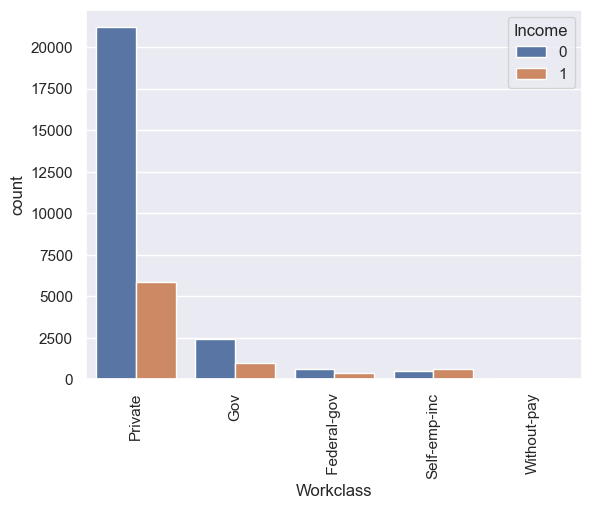

In [504]:
# Create countplot for the 'Workclass' column with 'Income' as hue
sns.countplot(x='Workclass', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

We put ‘Never-worked’ and ‘Without-pay’ in one category, we classify ‘State-gov’ and ‘Local-gov’ as ‘Gov’, and we add ‘Self-emp-not-inc’ in ‘Private’ category, since the distributions are similar.

We obtain 5 different categories in Workclass column

In [505]:
# Unique values of the 'Education' column
unique_Education = df['Education'].unique()

print("Unique values of Education:", unique_Education)

Unique values of Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [506]:
def combine_categories(df, column_name):
    # Mapping for category combinations
    category_mapping = {
    'Bachelors': 'Bachelors',
    'HS-grad': 'College',
    '11th': 'School',
    'Masters': 'Masters',
    '9th': 'School',
    'Some-college': 'College',
    'Assoc-acdm': 'Assoc',
    'Assoc-voc': 'Assoc',
    '7th-8th': 'School',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Doctorate',
    '5th-6th': 'School',
    '10th': 'School',
    '1st-4th': 'School',
    'Preschool': 'School',
    '12th': 'School'
    }
    
    # Update categories in the specified column
    df[column_name] = df[column_name].apply(lambda x: category_mapping.get(x.strip(), x))
    
    return df

# Example usage:
df = combine_categories(df, 'Education')


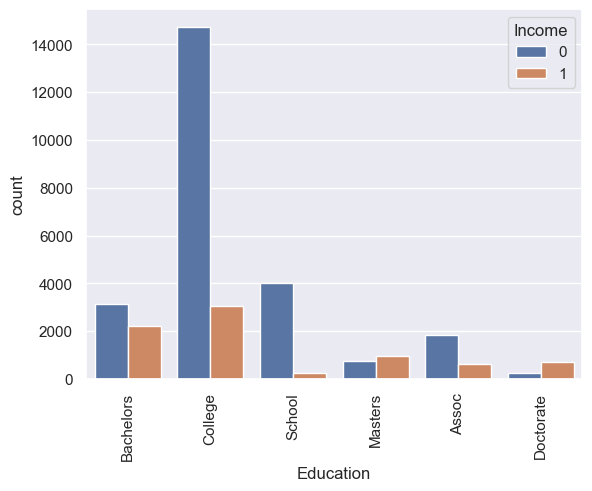

In [507]:
# Create countplot for the 'Workclass' column with 'Income' as hue
sns.countplot(x='Education', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

We combine all the columns relevant to schools in ‘School’ category, put ‘Doctorate’ and ‘Prof school’ in a single category ‘Doctorate’, ‘Assoc-acdm’ and ‘Assoc-voc’ in one category ‘Assoc’, and ‘HS-Grad’ and ‘Some-college’ in one category ‘College’.

We now obtain 6 categories of education which we feed to our machine learning model.

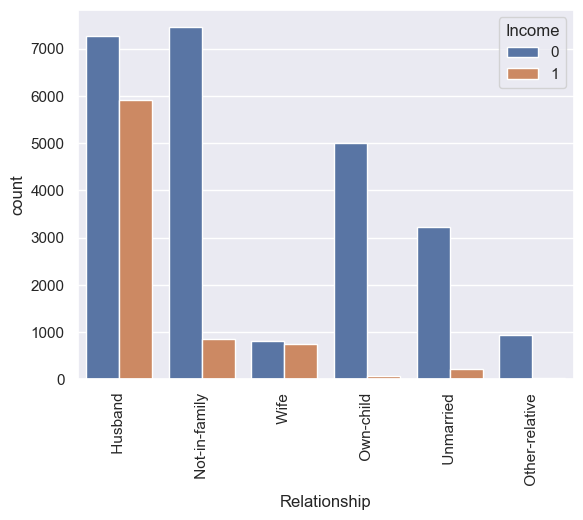

In [508]:
# Create countplot for the 'Workclass' column with 'Income' as hue
sns.countplot(x='Relationship', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

In [509]:
# Unique values of the 'Relationship' column
unique_Relationship = df['Relationship'].unique()

print("Unique values of Relationship:", unique_Relationship)

Unique values of Relationship: [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


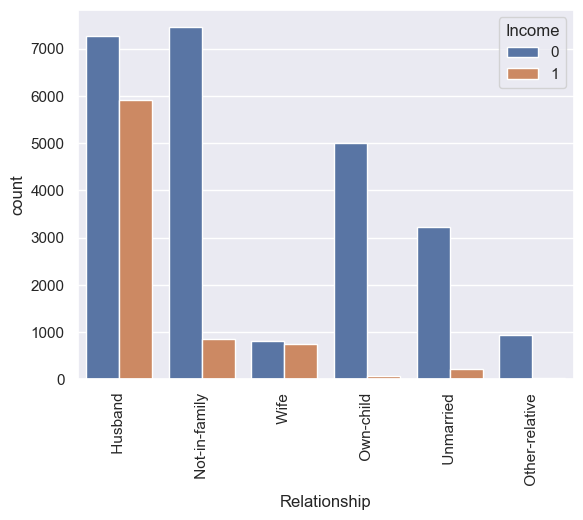

In [510]:
# Create countplot for the 'Workclass' column with 'Income' as hue
sns.countplot(x='Relationship', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

In [511]:
def combine_categories(df, column_name):
    # Mapping for category combinations
    category_mapping = {
    'Husband': 'Married-Civ-Spouse',
    'Wife': 'Married-Civ-Spouse',
    'Not-in-family': 'Never Married',
    'Own-child': 'No Spouse',
    'Unmarried': 'Never Married',
    'Other-relative': 'No Spouse'
    }
    
    # Update categories in the specified column
    df[column_name] = df[column_name].apply(lambda x: category_mapping.get(x.strip(), x))
    
    return df

# Example usage:
df = combine_categories(df, 'Relationship')

We combine ‘Divorced’, ‘Married-spouse-absent’, ‘Separated’, ‘Widowed’ and ‘Married-AF-Spouse’ to one category and name it as ‘No spouse’.

We now obtain 3 categories.

In [512]:
# Unique values of the 'Relationship' column
unique_Marital_status = df['Marital_status'].unique()

print("Unique values of Marital_status:", unique_Marital_status)

Unique values of Marital_status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


In [513]:
def combine_categories(df, column_name):
    # Mapping for category combinations
    category_mapping = {
    ' Married-civ-spouse': 'Married-Civ-Spouse',
    'Wife': 'Married-Civ-Spouse',
    'Not-in-family': 'Never Married',
    'Own-child': 'No Spouse',
    'Unmarried': 'Never Married',
    'Other-relative': 'No Spouse'
    }
    
    # Update categories in the specified column
    df[column_name] = df[column_name].apply(lambda x: category_mapping.get(x.strip(), x))
    
    return df

# Example usage:
df = combine_categories(df, 'Relationship')

In [514]:
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

[' Married-civ-spouse Divorced Married-spouse-absent Never-married Separated Married-AF-spouse Widowed']

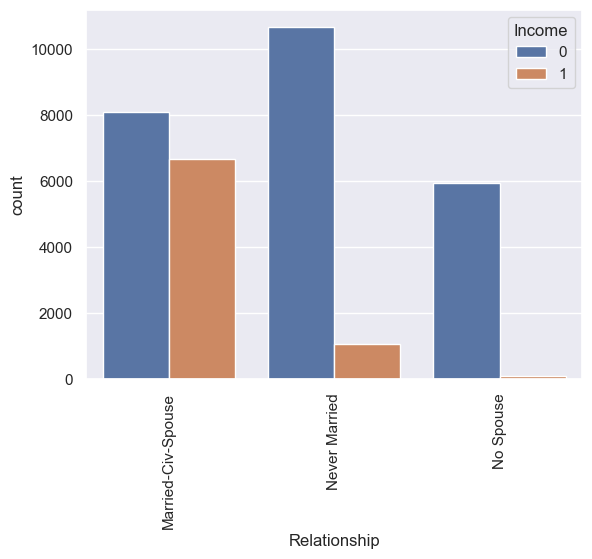

In [515]:
# Create countplot for the 'Workclass' column with 'Income' as hue
sns.countplot(x='Relationship', hue='Income', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

# Outlier Detection

In [516]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Private,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Married-Civ-Spouse,White,Male,0,0,13,United-States,0
1,38,Private,215646,College,9,Divorced,Handlers-cleaners,Never Married,White,Male,0,0,40,United-States,0
2,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Married-Civ-Spouse,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Married-Civ-Spouse,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Married-Civ-Spouse,White,Female,0,0,40,United-States,0


In [517]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)

Object Data Type Columns are:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

Number Data Type Columns are: 
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [518]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

In [519]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_col:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
        
df    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,2,83311,1,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,2,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,5,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,1,13,2,9,0,2,0,0,0,40,4,0
4,37,2,284582,4,14,2,3,0,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,0,12,2,12,0,4,0,0,0,38,38,0
32556,40,2,154374,2,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,2,9,6,0,1,4,0,0,0,40,38,0
32558,22,2,201490,2,9,4,0,2,4,1,0,0,20,38,0


In [520]:
df['Income'].value_counts()

Income
0    24719
1     7841
Name: count, dtype: int64

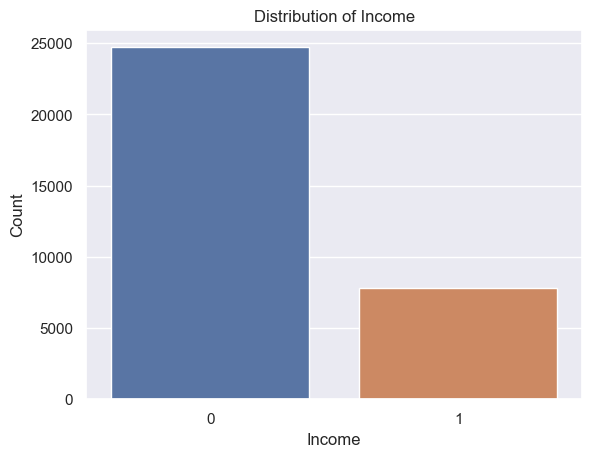

In [521]:
import matplotlib.pyplot as plt

# Create a countplot for the 'Income' column
sns.countplot(x='Income', data=df)

# Optional configurations for better visualization
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

<Axes: >

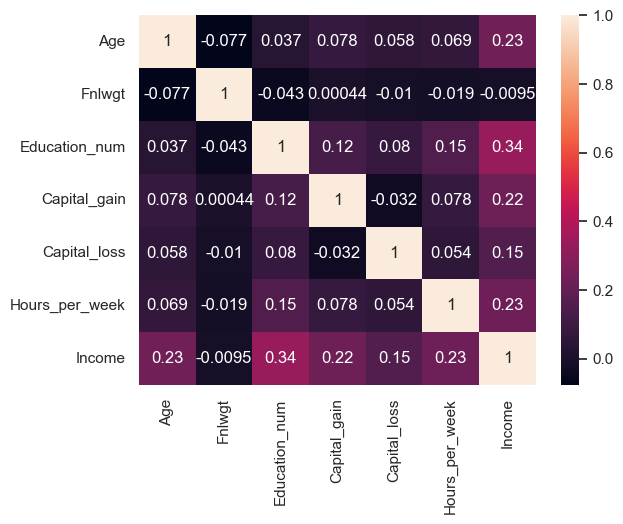

In [522]:
sns.heatmap(dfcorr,annot=True)

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


All Categorical columns are converted introp the numerical

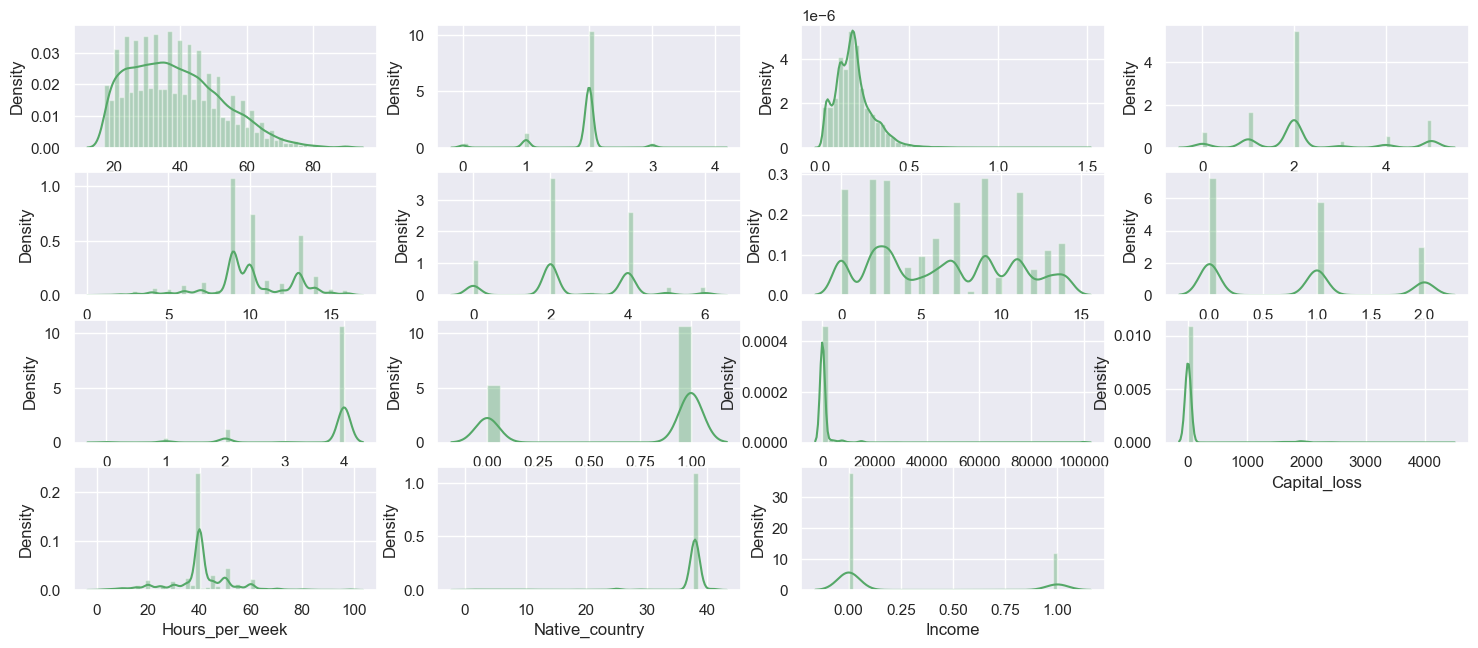

In [524]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [525]:
df.skew()

Age                0.558738
Workclass         -1.720672
Fnlwgt             1.446972
Education          0.814790
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.484525
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
Income             1.212383
dtype: float64

A skewness value exceeding +/- 0.5 requires special consideration. Columns containing categorical or target data should remain unchanged.

In [526]:
import numpy as np

# Square root transform for Fnlwgt column
df['Fnlwgt'] = np.sqrt(df['Fnlwgt'])

# Cube root transform for Capital_gain and Capital_loss columns twice
df['Capital_gain'] = np.cbrt(np.cbrt(df['Capital_gain']))
df['Capital_loss'] = np.cbrt(np.cbrt(df['Capital_loss']))


In [527]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,2,288.636450,1,13,2,3,0,4,1,0.000000,0.0,13,38,0
1,38,2,464.377002,2,9,0,5,1,4,1,0.000000,0.0,40,38,0
2,53,2,484.480134,5,7,2,5,0,2,1,0.000000,0.0,40,38,0
3,28,2,581.729318,1,13,2,9,0,2,0,0.000000,0.0,40,4,0
4,37,2,533.462276,4,14,2,3,0,4,0,0.000000,0.0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,507.249446,0,12,2,12,0,4,0,0.000000,0.0,38,38,0
32556,40,2,392.904569,2,9,2,6,0,4,1,0.000000,0.0,40,38,1
32557,58,2,389.756334,2,9,6,0,1,4,0,0.000000,0.0,40,38,0
32558,22,2,448.876375,2,9,4,0,2,4,1,0.000000,0.0,20,38,0


In [528]:
df.skew()

Age               0.558738
Workclass        -1.720672
Fnlwgt            0.189066
Education         0.814790
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.126702
Relationship      0.484525
Race             -2.435332
Sex              -0.719244
Capital_gain      3.103182
Capital_loss      4.304693
Hours_per_week    0.227636
Native_country   -4.205890
Income            1.212383
dtype: float64

# Now Checking Outliers

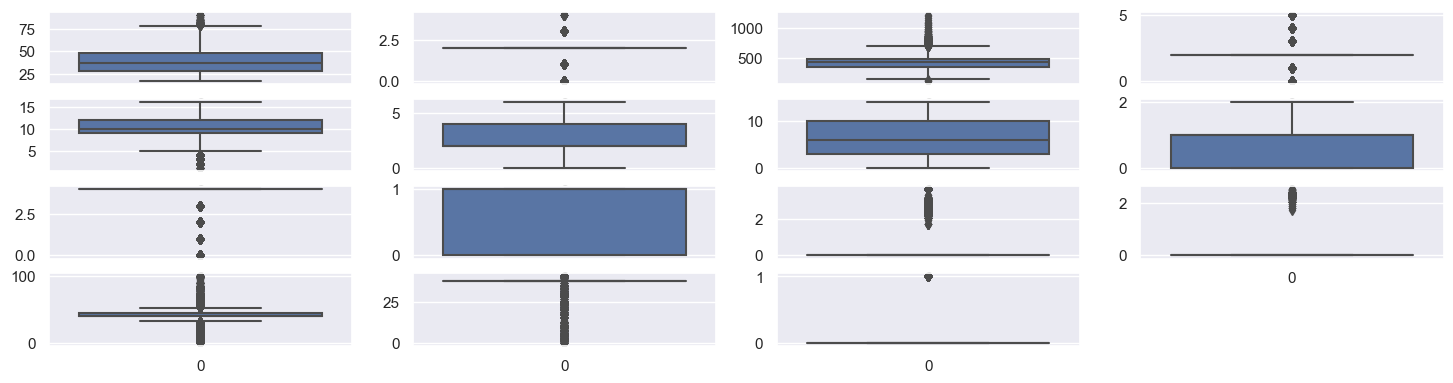

In [529]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed

Outliers removal using zscore, IQR

In [530]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [531]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (32560, 15)
After removing outliers:: (25483, 15)


Zscore removing some rows from data

In [532]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

22.0

In [533]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(20743, 15)


choosing ZSCORE because there is huge dataloss in IQR 

# Dividing data into X and Y

In [534]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [535]:
 x.shape

(32560, 14)

In [536]:
 y.shape

(32560,)

In [537]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [538]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [539]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,32560.000000,32560.00000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,0.46812,0.278109,0.442641,0.605373,0.435299,0.458711,0.366216,0.916462,0.669195,0.062135,0.042367,0.402423,0.889532
std,0.186858,0.12315,0.108030,0.271111,0.171514,0.251038,0.309181,0.376680,0.212204,0.470510,0.207720,0.191596,0.125996,0.148370
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.50000,0.209840,0.400000,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.926829
50%,0.273973,0.50000,0.281220,0.400000,0.600000,0.333333,0.428571,0.500000,1.000000,1.000000,0.000000,0.000000,0.397959,0.926829
75%,0.424658,0.50000,0.339499,0.400000,0.733333,0.666667,0.714286,0.500000,1.000000,1.000000,0.000000,0.000000,0.448980,0.926829
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can see that data has scalled.

Imbalanced learn

<Axes: xlabel='Income', ylabel='count'>

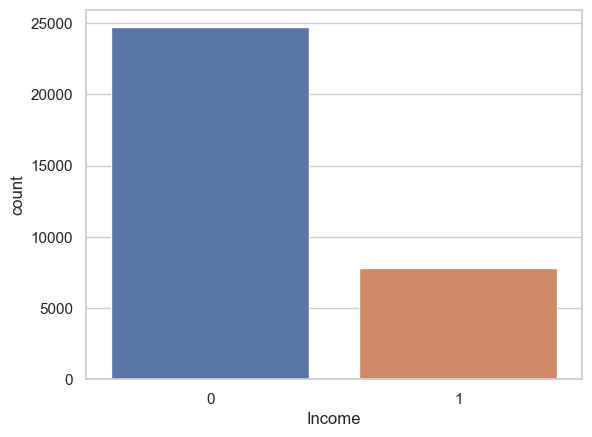

In [540]:
#Removing class imbalnceness probleme using SMOTE.
#Using OverSamling_BorderlineSMOTE

sns.set_style("whitegrid")
sns.countplot(x="Income", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 25000 in no and around 8000 in yes.

In [541]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (32560,)
Resample Target dataset shape (49438,)


Text(0, 0.5, 'count')

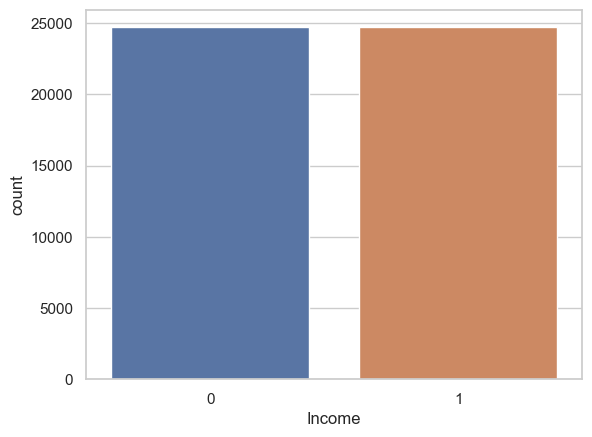

In [542]:
sns.set_style("whitegrid")
ax = sns.countplot(x=y_rus)  # Use x instead of y to match the desired output
ax.set_xlabel('Income')
ax.set_ylabel('count')

Now we have balaced data for model training

Spliting Train and Test data

In [543]:
from sklearn.model_selection import train_test_split

In [544]:
# Using 70-30 pattern for training & testing

x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.30,random_state=42)

Using random_state=42 is a popular convention for ensuring reproducibility. The number 42 is memorable and is often chosen due to its reference in "The Hitchhiker's Guide to the Galaxy." However, any fixed integer can be used to ensure consistent results in data splitting.

In [545]:
x_train.shape

(34606, 14)

In [546]:
x_test.shape

(14832, 14)

In [547]:
y_train.shape

(34606,)

In [548]:
y_test.shape

(14832,)

# MODEL BUILDING:

In [549]:
#Importing necessary/required libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [550]:
#LogisticRegression


logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7822319714600761


In [551]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7845873786407767
[[5293 2116]
 [1079 6344]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      7409
           1       0.75      0.85      0.80      7423

    accuracy                           0.78     14832
   macro avg       0.79      0.78      0.78     14832
weighted avg       0.79      0.78      0.78     14832

Training accuracy:: 0.7840836849101311
Test accuracy:: 0.7845873786407767


In [552]:
#DECISION TREE CLASSIFIER

dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8438261088160288


In [553]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8500539374325782
[[6246 1163]
 [1061 6362]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7409
           1       0.85      0.86      0.85      7423

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832

Training accuracy:: 1.0
Test accuracy:: 0.8500539374325782


In [554]:
#KNeighborsClassifier

knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8527047751239492


In [555]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8516046386192018
[[5493 1916]
 [ 285 7138]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      7409
           1       0.79      0.96      0.87      7423

    accuracy                           0.85     14832
   macro avg       0.87      0.85      0.85     14832
weighted avg       0.87      0.85      0.85     14832

Training accuracy:: 0.8855400797549557
Test accuracy:: 0.8516046386192018


In [556]:
#RandomForestClassifier

rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8969427651392777


In [557]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8975862998921251
[[6447  962]
 [ 557 6866]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      7409
           1       0.88      0.92      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Training accuracy:: 0.9999711032768884
Test accuracy:: 0.8975862998921251


ENSEMBLE TECHNIQUES

1.ADA BOOST CLASSIFIER

In [558]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.828027155200352


In [559]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8337378640776699
[[5932 1477]
 [ 989 6434]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      7409
           1       0.81      0.87      0.84      7423

    accuracy                           0.83     14832
   macro avg       0.84      0.83      0.83     14832
weighted avg       0.84      0.83      0.83     14832

Training accuracy:: 0.8311564468589262
Test accuracy:: 0.8337378640776699


2.BAGGING CLASSIFIER

In [560]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8838156398803969


In [561]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8762810140237325
[[6463  946]
 [ 889 6534]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7409
           1       0.87      0.88      0.88      7423

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

Training accuracy:: 0.992862509391435
Test accuracy:: 0.8762810140237325


3.Gradient Boosting classifier

In [562]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8459691085167019


In [563]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8524137001078749
[[5834 1575]
 [ 614 6809]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      7409
           1       0.81      0.92      0.86      7423

    accuracy                           0.85     14832
   macro avg       0.86      0.85      0.85     14832
weighted avg       0.86      0.85      0.85     14832

Training accuracy:: 0.848465584002774
Test accuracy:: 0.8524137001078749


GradientBoostingClassifier as final model for HYPER PARAMETER TUNING

# HYPER PARAMETER TUNING:

model training with best parameters

In [564]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 50],
    'learning_rate': [0.1, 0.5],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],  # Corrected parameter values
}

grbc_grid = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=4,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Ensure x_train and y_train are properly defined
grbc_grid.fit(x_train, y_train)

# Get predictions and evaluate accuracy
grbc_pred = grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning:", accuracy_score(y_test, grbc_pred))

# Show best parameters
grbc_grid.best_params_


Fitting 4 folds for each of 24 candidates, totalling 96 fits
Accuracy after parameter tuning: 0.9008225458468176


{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'n_estimators': 200}

model training with best parameters

In [565]:
best_param={
    'criterion' : ['friedman_mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['log_loss']
}

In [566]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [567]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8524137001078749


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

# Report of GradientBoostingClassifier

In [568]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      7409
           1       0.81      0.92      0.86      7423

    accuracy                           0.85     14832
   macro avg       0.86      0.85      0.85     14832
weighted avg       0.86      0.85      0.85     14832



In [569]:
print(len(best_grbc_pred))

14832


<Axes: >

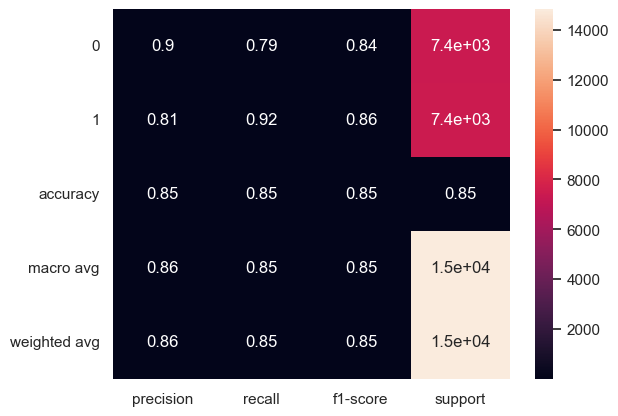

In [570]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [571]:
from sklearn.metrics import roc_auc_score

In [572]:
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

roc auc score:: 0.8523524107411881


In [573]:
from sklearn.metrics import roc_curve

In [574]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

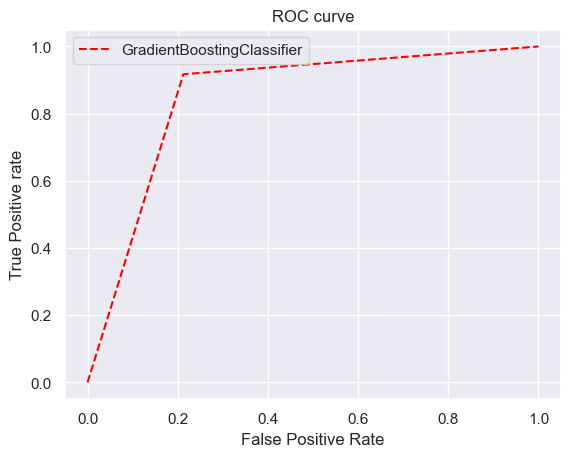

In [575]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

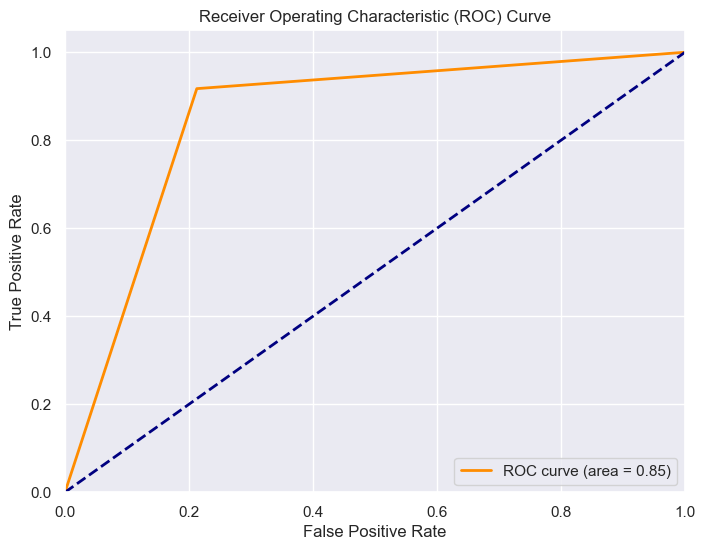

In [580]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_grbc_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Saving Model:

In [576]:
import joblib

In [584]:
joblib.dump(best_grbc_grid.best_estimator_,'Census Income Pred projects solution.obj')

['Census Income Pred projects solution.obj']

In [582]:
accuracy_score(y_test, best_grbc_pred)

0.8524137001078749

# Conclusion

We further proceed to test the object that we saved using joblib, and create a dataframe of predicted values – 85.24%

This marks the end of our process; we have successfully trained our model to predict the income of a person, with an accuracy of ~85%.

We moved step by step, analyzing, cleaning and modeling the data, and applied various machine learning models to achieve the desired predictions. We also tuned the model to improve the accuracy, and were able to achieve a model with quite a good accuracy.